---
title: Feature Selection
duration: "1:25"
creator:
    name: Francesco Mosconi
    city: SF
---

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Feature Selection
Week 5 | Lesson 4.1

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- describe what feature selection means and why it is important
- evaluate several techniques for feature selection
- use L1 and L2 regularization for feature selection

### STUDENT PRE-WORK
*Before this lesson, you should already be able to:*
- perform regression
- perform classification

### INSTRUCTOR PREP
*Before this lesson, instructors will need to:*
- Read in / Review any dataset(s) & starter/solution code
- Generate a brief slide deck
- Prepare any specific materials
- Provide students with additional resources

### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 5 mins | [Opening](#opening) | Opening |
| 25 mins | [Introduction](#introduction) | Introduction: Feature Selection |
| 25 mins | [Demo](#demo) | Demo: Feature importance in Logistic Regression |
| 10 mins | [Guided-practice](#guided-practice) | Guided Practice: Visualizing feature importance |
| 20 mins | [Ind-practice](#ind-practice) | Independent Practice: Topic |
| 5 mins | [Conclusion](#conclusion) | Conclusion |

<a name="opening"></a>
## Opening (5 mins)
In this class we will go over feature selection.
Feature selection is an important part of the model building process and there are several ways to approach it.

**Check:** Can anyone guess why we may want to select features?

> Acceptable answers:
- to reduce computational complexity of the model
- to reduce memory footprint of dataset
- to speed up training
- to have better insight into what factors are important
- to simplify


<a name="introduction"></a>
## Introduction: Feature Selection (25 mins)

In machine learning we usually start from a vector of features that encapsulate different aspects of our data and we use these to train a model that predicts a target variable.
Many of the datasets we have encountered so far were in tabular format, and features were well defined already. This is not usually the case.

**Check**Can you give a couple of examples of data where features must be extracted?

> Acceptable answers:
- Images
- Sound
- Text
- Movies
- Timeseries
- ...

For example, in the case of text data, a data-point usually corresponds to a document or a sentence, and we have to use feature extraction techniques to map each document to a vector of numbers. Similarly, to classify images, we must first represent them as a vector of numbers.
As we have seen with the `CountVectorizer` for text data, feature extraction can result in a very large number of features, some of which may have more predictive power than others.

|Text|the|cat|is|on|table|blue|sky|...|
|----|
|The cat is on the table|2|1|1|1|1|0|0|...|
|The table is blue|1|0|1|0|1|1|0|...|
|The sky is blue|1|0|1|0|0|0|1|...|
|...|...|...|...|...|...|...|...|...|

In the above example the word `the` probably has zero predictive power.

In a different scenario, the tabular data may be a result of a database dump where irrelevant columns were not removed.


|CustomerID |CompanyName |ContactName | ContactTitle |Address|City | Region | PostalCode | Country |Phone | Fax|
|---|
|ALFKI| Alfreds Futterkiste| Maria Anders | Sales Representative | Obere Str. 57 | Berlin|| 12209| Germany | 030-0074321| 030-0076545|
|ANATR| Ana Trujillo Emparedados y helados | Ana Trujillo | Owner| Avda. de la Constitución 2222 | México D.F. || 05021| Mexico| (5) 555-4729 | (5) 555-3745|
|ANTON| Antonio Moreno Taquería| Antonio Moreno | Owner| Mataderos2312 | México D.F. || 05023| Mexico| (5) 555-3932 |
|...|...|...|...|...|...|...|...|...|...|...|

Feature Selection is a way to reduce the number of features to simplify the model while retaining its predictive power.



### Bottom up feature selection

One way to select features is to first find the single feature that gives the highest score and then iteratively add the other features one by one, each time checking how much the score improves. The first features will probably improve the score a lot, while score improvement will be smaller and smaller the more features we add. In other words, adding complexity to the model will yield diminishing returns.

One can then set a critearia to only retain the first N features or the first features that achieve 90% as good a score as all the features.

### Top Down feature selection 

Another way to select features is to impose a global constraint on the model, that will force feature selection. For example, in the case of text vectorization, we could impose that a feature needs to have a document frequency higher than a certain threshold to be considered relevant.


### Random shuffling

A way to check if a feature has any predictive power, is the following. First, we calculate the score of the model, then we randomize the values along that column. If the feature has any predictive power, this should amount to a worse score. On the other hand, if the feature has no predictive power at all, this will result in no change in the score and thus we can toss that feature.

**Check** Can anyone restate or recall these definitions in their own words?

### Regularization

Regularization is an example of a top-down technique that works with parametric models (like Logistic Regression or Support Vector Machine). It imposes a global constraint on the values of the parameters that define the model. The regularized model is found solving a new minimization problem where two terms are present: the term defining the model and the term defining the regularization.

In general, a regularization term $R(f)$ is introduced to a general loss function:

$$\min_f \sum_{i=1}^{n} V(f(\hat x_i), \hat y_i) + \lambda R(f)$$

for a loss function $V$ that describes the cost of predicting $f(x)$ when the label is $y$, such as the square loss or hinge loss, and for the term $\lambda$ which controls the importance of the regularization term. $R(f)$ is typically a penalty on the complexity of $f$, such as restrictions for smoothness or bounds on the vector space norm.

#### l1 and l2 regularization

For the case where our model $f$ is parametric (e.g. like in linear models), we can express the regularization term as a norm on the parameters. Depending on the kind of norm chosen for the parameters regularization can be:

l1 or Lasso regularization:
$$ R(f) \propto \sum{|\beta_i|}$$

or

l2 or Ridge regularization:
$$ R(f) \propto \sum{\beta_i^2}$$

where $\beta_i$ are the parameters of the model.

### Feature importance

Some models offer an intrinsic way of evaluating feature importance. For example, as we will see next week, _Decision Trees_ have a way to assess how much each feature is contributing to the overall prediction.

Logistic Regression also offers an intrinsic way of assessing feature importance. In fact, since the Logistic Regression model is linear in the features, the size of each coefficient represents the impact a unit change in that feature has on the overall model. In order to interpret this as feature importance, we need to make sure that features are normalized to have the same scale, otherwise a unit change in two different feature could actually imply a very different change.

<a name="demo"></a>
## Demo: Feature importance in Logistic Regression (25 mins)

As we have said, the coefficients in logistic regression can be interpreted as feature importance if the data is normalized. We will show this on the Iris dataset for convenience.

First load the data.

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Then let's initialize a logistic regression model:

In [13]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The `LogisticRegression` class exposes an attribute called `coef_`. Let's have a look at it:

In [25]:
model.coef_

array([[ 0.41498833,  1.46129739, -2.26214118, -1.0290951 ],
       [ 0.41663969, -1.60083319,  0.57765763, -1.38553843],
       [-1.70752515, -1.53426834,  2.47097168,  2.55538211]])

Nice! According to the documentation this is:

    coef_ : array, shape (n_classes, n_features)
        Coefficient of the features in the decision function.
        
Let's display it in a nicer way:

In [26]:
coeffs = pd.DataFrame(model.coef_, columns = iris.feature_names, index =iris.target_names)
coeffs

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,0.414988,1.461297,-2.262141,-1.029095
versicolor,0.416640,-1.600833,0.577658,-1.385538
virginica,-1.707525,-1.534268,2.470972,2.555382


**Check** Can we conclude that `petal length (cm)` is the most significant feature to identify `setosa` ?

> Answer:
No! Since we have not normalized the data, the magnitude of coefficients does not necessarily reflect their importance.

Let's normalize the data and repeat the exercise:

> Student should do this:

In [27]:
from sklearn.preprocessing import StandardScaler
X_norm =  StandardScaler().fit_transform(X)

model.fit(X_norm, y)

coeffs = pd.DataFrame(model.coef_, columns = iris.feature_names, index =iris.target_names)
coeffs

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,-0.810166,1.393699,-1.687386,-1.518991
versicolor,0.130380,-1.246338,0.789195,-0.889440
virginica,0.012990,-0.144535,1.863173,2.698873


Notice that normalization did change the sign and magnitude of the LR coefficients. Also notice that the Logistic Regression class has a `penalty` parameter that allows us to choose between `l1` and `l2` regularization. Notice that some of the solvers only support `l2` regularization.

In [29]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Check** Try changing the penalty to `l1`, do the coefficients change?

**Optional Check** Check score with `cross_val_score` and select best model

<a name="guided-practice"></a>
## Guided Practice: Visualizing feature importance (10 mins)

In some cases we may want to visualize feature importance in a plot. One way to do this is to display the matrix of coefficients with a color scale. We can do this using Matplolib as follows:

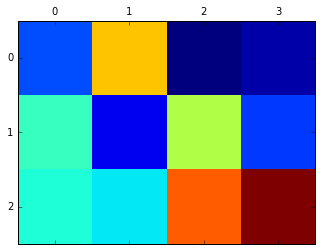

In [30]:
# first import matplolib
%matplotlib inline
import matplotlib.pyplot as plt

# then create a figure and a plot
fig = plt.figure()
ax = fig.add_subplot(111)

# display the matrix
cax = ax.matshow(coeffs)

This is nice, but what if we want to make it a bit clearer to the user?

#### Exercise: Add colorbar and ticks

Find a way to add colorbars and ticks, it should look like this:

![coefficients](./images/coefficients.png)

> Answer
```python
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(coeffs)
fig.colorbar(cax)
ax.set_xticklabels(['']+list(coeffs.columns), rotation=45)
ax.set_yticklabels(['']+list(coeffs.index))
```

<a name="ind-practice"></a>
## Independent Practice: Topic (20 mins)

Scikit learn offers several other regularization methods. The following exercise is in pairs:

Go to the [documentation page](http://scikit-learn.org/stable/modules/feature_selection.html), pick one method and read about it for 10 minutes.

Try to answer the following questions:

1. is it top-down or bottom-up?
- does it work for both regression and classification?
- can it be used in a pipeline?

In the last 10 minutes expose your findings to the class

> Instructor note:
split the class in 10 groups and assign one of these to each group:
1. feature_selection.GenericUnivariateSelect([...])
- feature_selection.SelectPercentile([...])
- feature_selection.SelectKBest([score_func, k])
- feature_selection.SelectFpr([score_func, alpha])
- feature_selection.SelectFdr([score_func, alpha])
- feature_selection.SelectFromModel(estimator)
- feature_selection.SelectFwe([score_func, alpha])
- feature_selection.RFE(estimator[, ...])
- feature_selection.RFECV(estimator[, step, ...])
- feature_selection.VarianceThreshold([threshold])

<a name="conclusion"></a>
## Conclusion (5 mins)
Today we have learned about many ways to select features by importance. This will be particularly useful when we deal with a large number of features.

### ADDITIONAL RESOURCES

- [Scikit Learn Documentation on Feature Selection](http://scikit-learn.org/stable/modules/feature_selection.html)
- [Matplotlib documentation](http://matplotlib.org/api/pyplot_api.html)
- [Wikipedia page on regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics))